In [ ]:
#!conda upgrade scikit-learn

Solving environment: \ 
  - defaults/noarch::path.py-12.0.2-py_0, defaults/osx-64::path-13.2.0-py37_0
  - defaults/noarch::path.py-12.4.0-0, defaults/osx-64::path-13.1.0-py37done

## Package Plan ##

  environment location: /Users/rjdaskeivch/anaconda3

  added / updated specs:
    - scikit-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _anaconda_depends-2020.02  |           py37_0           5 KB
    _py-xgboost-mutex-2.0      |            cpu_0           8 KB
    astroid-2.4.0              |           py37_0         501 KB
    astropy-4.0.1.post1        |   py37h01d97ff_1         7.5 MB
    atomicwrites-1.4.0         |             py_0          11 KB
    beautifulsoup4-4.9.0       |           py37_0         165 KB
    bleach-3.1.4               |             py_0         114 KB
    bokeh-2.0.2                |           py37_0         6.8 MB
    cctools-927.0.2            |    

In [1]:
#prepare the environment
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import sklearn

import sklearn
pd.show_versions()
#matplotlib.__version__
sklearn.__version__


INSTALLED VERSIONS
------------------
commit           : None
python           : 3.7.3.final.0
python-bits      : 64
OS               : Darwin
OS-release       : 17.7.0
machine          : x86_64
processor        : i386
byteorder        : little
LC_ALL           : None
LANG             : en_US.UTF-8
LOCALE           : en_US.UTF-8

pandas           : 1.0.3
numpy            : 1.18.1
pytz             : 2020.1
dateutil         : 2.8.1
pip              : 20.0.2
setuptools       : 46.4.0.post20200518
Cython           : 0.29.17
pytest           : 5.4.2
hypothesis       : 5.11.0
sphinx           : 3.0.3
blosc            : None
feather          : None
xlsxwriter       : 1.2.8
lxml.etree       : 4.5.0
html5lib         : 1.0.1
pymysql          : None
psycopg2         : None
jinja2           : 2.11.2
IPython          : 7.13.0
pandas_datareader: None
bs4              : 4.9.0
bottleneck       : 1.3.2
fastparquet      : None
gcsfs            : None
lxml.etree       : 4.5.0
matplotlib       : 3.1.3
nu

'0.22.1'

In [11]:
#!ls


In [12]:
#load the data
from sklearn.datasets import load_boston
boston_dataset = load_boston()
print(type(boston_dataset))

<class 'sklearn.utils.Bunch'>


In [13]:
#explore the data
print(boston_dataset.keys())
print(boston_dataset['feature_names'])
print(type(boston_dataset['feature_names']))
print(boston_dataset['DESCR'])


dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
<class 'numpy.ndarray'>
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distanc

Let's look at how the number of rooms (RM) affects the price (MEDV)
In our linear regression, MEDV will be our Y value.  RM will be our X value.  

In [14]:
#prepare the data
from sklearn.model_selection import train_test_split
num_Rooms_Train, num_Rooms_Test, med_price_Train, med_Price_Test = train_test_split(boston_dataset.data[:,5].reshape(-1,1), boston_dataset.target.reshape(-1,1))
print(num_Rooms_Train.shape)
print(med_price_Train.shape)
print(num_Rooms_Test.shape)
print(num_Rooms_Test[0])


(379, 1)
(379, 1)
(127, 1)
[7.393]


In [15]:
#implement linear regression model
from sklearn.linear_model import LinearRegression
price_room = LinearRegression()
print(type(price_room))
price_room.fit (num_Rooms_Train,med_price_Train)

<class 'sklearn.linear_model.base.LinearRegression'>


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [1]:
#predict on linear regression model

#print(price_room.predict(num_Rooms_Test[0].reshape(-1,1)))
print(price_room.predict(np.array([7.564,4.7,9.3]).reshape(-1,1)))
#print(num_Rooms_Test[0])
#print([7.564])
print(price_room.predict(num_Rooms_Test[5].reshape(-1,1)))
print(price_room.predict(num_Rooms_Test[1:10]))
med_price_pred = price_room.predict(num_Rooms_Test)      

NameError: name 'price_room' is not defined

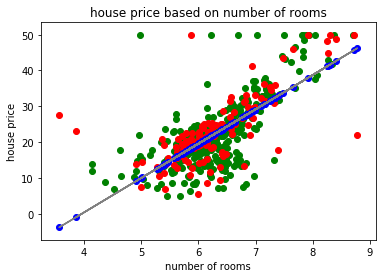

In [17]:
#Let's graph it:
#num_Rooms_Train, num_Rooms_Test, med_price_Train, med_Price_Test

import matplotlib.pyplot as plt
plt.scatter(num_Rooms_Train, med_price_Train, color = 'green')
plt.scatter(num_Rooms_Test, med_Price_Test, color = 'red')   
plt.scatter(num_Rooms_Test, med_price_pred, color = 'blue')  # The predicted temperatures of the same X_test input.
plt.plot(num_Rooms_Test, price_room.predict(num_Rooms_Test), color = 'gray')
plt.title('house price based on number of rooms')
plt.xlabel('number of rooms')
plt.ylabel('house price')
plt.show()

In [18]:
from sklearn.metrics import mean_squared_error
price_room_predictions = price_room.predict(num_Rooms_Train)
pr_mse = mean_squared_error(med_price_Train,price_room_predictions)
pr_rmse = np.sqrt(pr_mse)
pr_rmse

6.467038724760706

In [19]:
data = pd.DataFrame(boston_dataset.data, columns = boston_dataset.feature_names)

In [20]:
data.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [21]:
boston_dataset.target.shape


(506,)

In [22]:
data['Price']= boston_dataset.target
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [23]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [24]:
data["CHAS"].value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
Price      506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


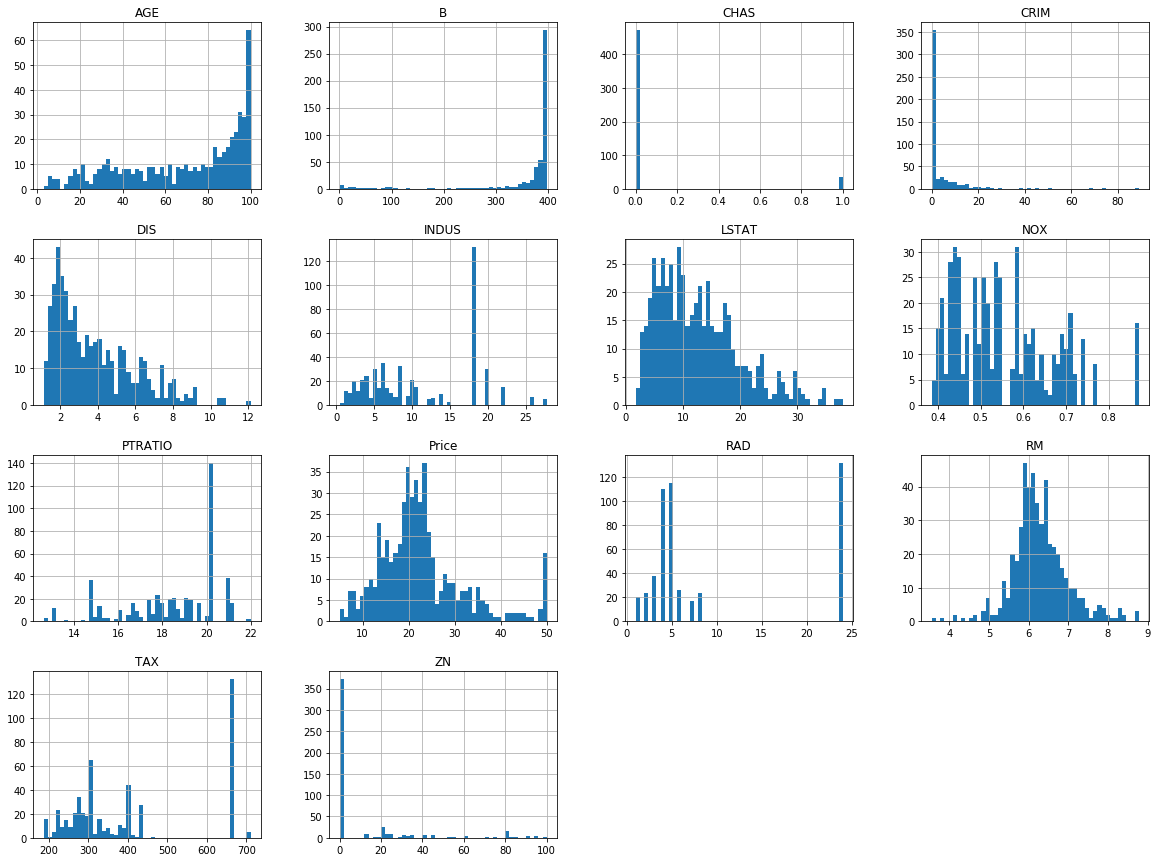

In [26]:
%matplotlib inline
data.hist(bins=50, figsize=(20,15))
plt.show()

In [27]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(data, test_size=0.2,random_state=42)

    

In [28]:
print(train_set.shape)
print(test_set.shape)
print(type(train_set))
print(train_set[:5])

(404, 14)
(102, 14)
<class 'pandas.core.frame.DataFrame'>
         CRIM    ZN  INDUS  CHAS     NOX     RM   AGE     DIS   RAD    TAX  \
477  15.02340   0.0  18.10   0.0  0.6140  5.304  97.3  2.1007  24.0  666.0   
15    0.62739   0.0   8.14   0.0  0.5380  5.834  56.5  4.4986   4.0  307.0   
332   0.03466  35.0   6.06   0.0  0.4379  6.031  23.3  6.6407   1.0  304.0   
423   7.05042   0.0  18.10   0.0  0.6140  6.103  85.1  2.0218  24.0  666.0   
19    0.72580   0.0   8.14   0.0  0.5380  5.727  69.5  3.7965   4.0  307.0   

     PTRATIO       B  LSTAT  Price  
477     20.2  349.48  24.91   12.0  
15      21.0  395.62   8.47   19.9  
332     16.9  362.25   7.83   19.4  
423     20.2    2.52  23.29   13.4  
19      21.0  390.95  11.28   18.2  


In [29]:
corr_matrix = data.corr()
print(type(corr_matrix))
print(corr_matrix.shape)
print(corr_matrix["Price"])

<class 'pandas.core.frame.DataFrame'>
(14, 14)
CRIM      -0.388305
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
Price      1.000000
Name: Price, dtype: float64


In [30]:
corr_matrix["Price"].sort_values(ascending=False)

Price      1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: Price, dtype: float64

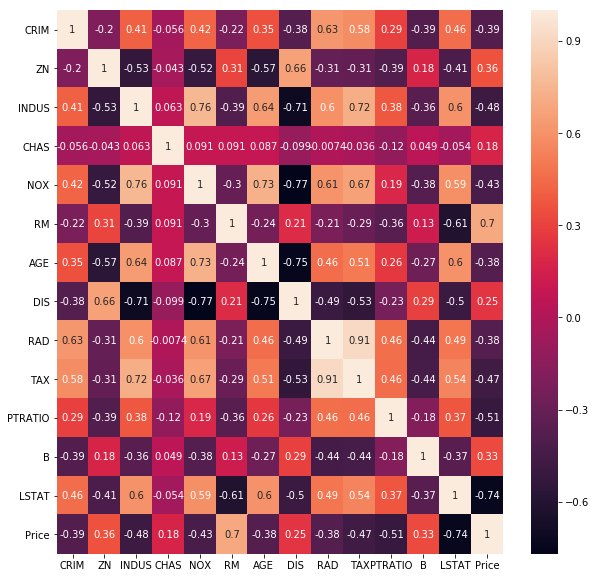

In [31]:
import seaborn as sns

plt.figure(figsize=(10,10))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

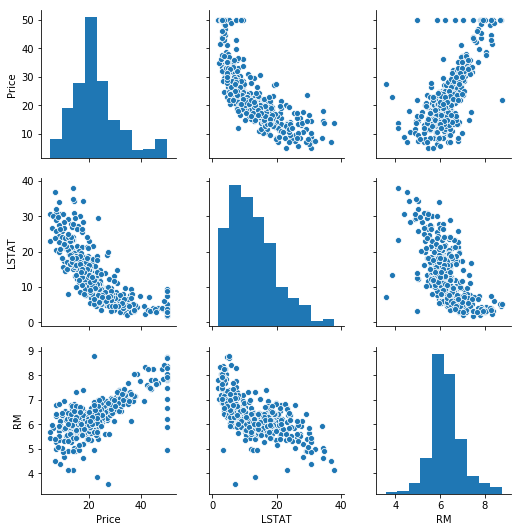

In [32]:
sns.pairplot(data[["Price","LSTAT","RM"]])
plt.show()

In [33]:
features=train_set.drop("Price",axis=1)
label=train_set["Price"].copy()
print(type(features))
print(features.head())
print(type(label))
print(label.head())

<class 'pandas.core.frame.DataFrame'>
         CRIM    ZN  INDUS  CHAS     NOX     RM   AGE     DIS   RAD    TAX  \
477  15.02340   0.0  18.10   0.0  0.6140  5.304  97.3  2.1007  24.0  666.0   
15    0.62739   0.0   8.14   0.0  0.5380  5.834  56.5  4.4986   4.0  307.0   
332   0.03466  35.0   6.06   0.0  0.4379  6.031  23.3  6.6407   1.0  304.0   
423   7.05042   0.0  18.10   0.0  0.6140  6.103  85.1  2.0218  24.0  666.0   
19    0.72580   0.0   8.14   0.0  0.5380  5.727  69.5  3.7965   4.0  307.0   

     PTRATIO       B  LSTAT  
477     20.2  349.48  24.91  
15      21.0  395.62   8.47  
332     16.9  362.25   7.83  
423     20.2    2.52  23.29  
19      21.0  390.95  11.28  
<class 'pandas.core.series.Series'>
477    12.0
15     19.9
332    19.4
423    13.4
19     18.2
Name: Price, dtype: float64


In [34]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder=OneHotEncoder()
CHAS_1hot = cat_encoder.fit_transform(data[["CHAS"]])
CHAS_1hot


/Users/rjdaskeivch/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


<506x2 sparse matrix of type '<class 'numpy.float64'>'
	with 506 stored elements in Compressed Sparse Row format>

In [35]:
print(CHAS_1hot.toarray())

[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [36]:
#only numerical features need to be scaled:
num_features = features.drop("CHAS",axis=1)
num_features.columns

Index(['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [37]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
num_attribs = list(num_features)
cat_attribs = ["CHAS"]

prep_pipeline = ColumnTransformer([
    ("std_scaler", StandardScaler(),num_attribs),
    ("one_hot", OneHotEncoder(),cat_attribs)
])


In [38]:
data_prepared = prep_pipeline.fit_transform(features)

/Users/rjdaskeivch/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [39]:
data_prepared[:5]

array([[ 1.28770177, -0.50032012,  1.03323679,  0.48925206, -1.42806858,
         1.02801516, -0.80217296,  1.70689143,  1.57843444,  0.84534281,
        -0.07433689,  1.75350503,  1.        ,  0.        ],
       [-0.33638447, -0.50032012, -0.41315956, -0.15723342, -0.68008655,
        -0.43119908,  0.32434893, -0.62435988, -0.58464788,  1.20474139,
         0.4301838 , -0.5614742 ,  1.        ,  0.        ],
       [-0.40325332,  1.01327135, -0.71521823, -1.00872286, -0.40206304,
        -1.6185989 ,  1.3306972 , -0.97404758, -0.60272378, -0.63717631,
         0.06529747, -0.65159505,  1.        ,  0.        ],
       [ 0.38822983, -0.50032012,  1.03323679,  0.48925206, -0.30045039,
         0.59168149, -0.8392398 ,  1.70689143,  1.57843444,  0.84534281,
        -3.86819251,  1.52538664,  1.        ,  0.        ],
       [-0.32528234, -0.50032012, -0.41315956, -0.15723342, -0.83109424,
         0.03374663, -0.00549428, -0.62435988, -0.58464788,  1.20474139,
         0.3791194 , -0.16

In [40]:
print(type(data_prepared))

<class 'numpy.ndarray'>


In [41]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(data_prepared, label)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [42]:
some_data = features.iloc[:5]
some_labels = label.iloc[:5]
some_data_prepared = prep_pipeline.transform(some_data)
print("Predictions:", lr.predict(some_data_prepared))


Predictions: [10.96952405 19.41196567 23.06419602 12.1470648  18.3738116 ]


In [43]:
print("Labels:", list(some_labels))

Labels: [12.0, 19.9, 19.4, 13.4, 18.2]


In [44]:
from sklearn.metrics import mean_squared_error
bh_predictions = lr.predict(data_prepared)
lr_mse = mean_squared_error(label,bh_predictions)
lr_rmse = np.sqrt(lr_mse)
lr_rmse

4.6520331848801675

In [45]:
#Let's compare this against our one-feature analysis earlier:
from sklearn.metrics import mean_squared_error
price_room_predictions = price_room.predict(num_Rooms_Train)
pr_mse = mean_squared_error(med_price_Train,price_room_predictions)
pr_rmse = np.sqrt(pr_mse)
pr_rmse


6.467038724760706

In [46]:
from sklearn.tree import DecisionTreeRegressor
#print(data_prepared)
#print(label)
#print(label.values)

tree_reg = DecisionTreeRegressor()

tree_reg.fit(data_prepared,label)
tree_predictions = tree_reg.predict(data_prepared)
tree_mse = mean_squared_error(label,tree_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [47]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, data_prepared, label, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [48]:
print("Scores:", tree_rmse_scores)

Scores: [3.8137428  4.21839757 5.48652451 7.04444081 7.74130157 3.69824283
 4.89867329 5.27612547 4.15695201 5.51606744]


In [49]:
print("Mean:", tree_rmse_scores.mean())

Mean: 5.185046829850171


In [50]:
print("Standard deviation:", tree_rmse_scores.std())

Standard deviation: 1.2792577331681259


In [51]:
from sklearn.model_selection import cross_val_score
lr_scores = cross_val_score(lr, data_prepared, label, scoring="neg_mean_squared_error", cv=10)
lr_rmse_scores = np.sqrt(-lr_scores)

In [52]:
print("Scores:", lr_rmse_scores)

Scores: [3.76298481 4.25110998 5.34719644 6.71464778 4.59265163 5.17395941
 4.43145447 4.5777583  3.6723473  5.77030866]


In [53]:
print("Mean:", lr_rmse_scores.mean())

Mean: 4.829441880454275


In [54]:
print("Standard deviation:", lr_rmse_scores.std())

Standard deviation: 0.8896329730748544


In [55]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(data_prepared,label)
forest_predictions = forest_reg.predict(data_prepared)
forest_mse = mean_squared_error(label,forest_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

/Users/rjdaskeivch/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


1.5490719035526523

In [56]:
forest_scores = cross_val_score(forest_reg, data_prepared, label, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)

In [57]:
print("Scores:", forest_rmse_scores)
print("Mean:", forest_rmse_scores.mean())
print("Standard Deviation:", forest_rmse_scores.std())

Scores: [3.310014   3.49689165 2.46450114 5.54768156 5.27535283 2.96548563
 3.69575162 3.10178376 3.09928701 4.90155486]
Mean: 3.7858304056337615
Standard Deviation: 1.0121154521888276


In [58]:
print("Mean:", forest_rmse_scores.mean())

Mean: 3.7858304056337615


In [59]:
print("Standard Deviation:", forest_rmse_scores.std())

Standard Deviation: 1.0121154521888276


In [60]:
forest_reg.get_params()

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [61]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'n_estimators':[3,10,30], 'max_features':[2,4,6,8]},
             {'bootstrap': [False], 'n_estimators':[3,10], 'max_features':[2,3,4]}]

In [62]:
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error',
                           return_train_score=True)

In [63]:
grid_search.fit(data_prepared, label)

/Users/rjdaskeivch/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [64]:
grid_search.best_params_

{'bootstrap': False, 'max_features': 4, 'n_estimators': 10}

In [65]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=None,
           max_features=4, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=None, oob_score=False,
           random_state=None, verbose=0, warm_start=False)

In [66]:
cvres = grid_search.cv_results_
print(type(cvres))

<class 'dict'>


In [67]:
print(cvres.keys())

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_max_features', 'param_n_estimators', 'param_bootstrap', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'split3_train_score', 'split4_train_score', 'mean_train_score', 'std_train_score'])


In [68]:
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)
    

4.998720408321719 {'max_features': 2, 'n_estimators': 3}
4.195065642224714 {'max_features': 2, 'n_estimators': 10}
4.053546158050447 {'max_features': 2, 'n_estimators': 30}
4.3232441573434635 {'max_features': 4, 'n_estimators': 3}
3.982143434964851 {'max_features': 4, 'n_estimators': 10}
3.740092272795005 {'max_features': 4, 'n_estimators': 30}
4.6435678925021895 {'max_features': 6, 'n_estimators': 3}
3.973605708513701 {'max_features': 6, 'n_estimators': 10}
3.7998871682918667 {'max_features': 6, 'n_estimators': 30}
4.5501402316426205 {'max_features': 8, 'n_estimators': 3}
3.7927803354883776 {'max_features': 8, 'n_estimators': 10}
3.6738957352498933 {'max_features': 8, 'n_estimators': 30}
4.755285693226267 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
4.066644047845986 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
4.557750986989739 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
3.814461636228293 {'bootstrap': False, 'max_features': 3, 'n_estimator

In [69]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0.06312138, 0.00550838, 0.09412486, 0.07222751, 0.32347615,
       0.02080104, 0.05941111, 0.01347722, 0.01406386, 0.11337014,
       0.02049494, 0.1849661 , 0.00978941, 0.00516792])

In [70]:
cat_encoder = prep_pipeline.named_transformers_["one_hot"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
cat_one_hot_attribs

[0.0, 1.0]

In [71]:
sorted(zip(feature_importances, (num_attribs+cat_one_hot_attribs)))

[(0.0051679153604253375, 1.0),
 (0.00550837773595606, 'ZN'),
 (0.009789405589732566, 0.0),
 (0.01347721606206766, 'RAD'),
 (0.014063863007236627, 'TAX'),
 (0.020494942765730537, 'B'),
 (0.020801040129656473, 'AGE'),
 (0.05941110824753145, 'DIS'),
 (0.06312137883744447, 'CRIM'),
 (0.07222750930139123, 'NOX'),
 (0.09412485731734055, 'INDUS'),
 (0.1133701371125793, 'PTRATIO'),
 (0.18496609800646022, 'LSTAT'),
 (0.3234761505264475, 'RM')]

In [72]:
final_model = grid_search.best_estimator_

X_test = test_set.drop("Price", axis=1)
y_test = test_set["Price"].copy()

In [73]:
X_test_prepared = prep_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

3.198959696097296

In [74]:
from sklearn.externals import joblib
joblib.dump(final_model, "my_model.pkl")

['my_model.pkl']

In [75]:
!ls my_model.*


my_model.pkl
